In [8]:
import sys
sys.path.append('../../lib')
from microscope_functions import snap_image as snap_image_Orca
import os
from harvesters.core import Harvester
import numpy as np
import matplotlib.pyplot as plt
from pycromanager import Core
from time import sleep
harvester = Harvester()
cti_file= "C:\\Program Files\\MATRIX VISION\\mvIMPACT Acquire\\bin\\x64\\mvGenTLProducer.cti"
harvester.add_file(cti_file)
harvester.update()
 

In [9]:
core=Core()
ia = harvester.create_image_acquirer(0)

C:\Users\BETZLA~1\AppData\Local\Temp/ipykernel_13304/777828076.py:2: DeprecationWarning: please consider to use create() instead of create_image_acquirer().
  ia = harvester.create_image_acquirer(0)


In [10]:
def snap_image_EoSens():
    ia.start()
    frame=ia.fetch_buffer()
    ia.stop()
    image=frame.payload.components[0].data
    image=np.reshape(image,(frame.payload.components[0].height,frame.payload.components[0].width))
    return image

In [11]:
core.set_exposure(1)# set exposure time in milliseconds
core.get_exposure()

1.016764705882353

In [12]:
ia.remote_device.node_map.Gain.value = 4.0
ia.remote_device.node_map.AcquisitionFrameRate.value = 1

**Camera Comparison in Different Microscope Configurations**

We aim to assess whether we have sufficient light to utilize the camera with higher time resolution. We're comparing two cameras:

- **EoSens**
- **Orca Fusion**

We can make the following adjustments to the microscope:

1. Choice of lamp.
2. Decision to insert a 100x lens after the lamp.
3. Choice to incorporate the second lens in the condenser.

In total, this offers us 8 different configurations to test with the 2 cameras. Additionally, we want to determine the maximum exposure time at which the beats remain visible.


In [13]:

def save_image(camera, lamp_config, second_lens_in_condensor, exposure_time):
    dir_structure = os.path.join("pictures", camera, lamp_config, 
                                 "with_second_condensor_lens" if second_lens_in_condensor else "without_second_condensor_lens")
    
    if not os.path.exists(dir_structure):
        os.makedirs(dir_structure)
    
    filename = os.path.join(dir_structure, f"exposure_{exposure_time}.jpg")
    
    if camera == "Orca":
        core.set_exposure(exposure_time*1e3) # set exposure time in milliseconds
        image = snap_image_Orca()
    elif camera == "EoSens":
        ia.remote_device.node_map.ExposureTime.value = exposure_time*1e6 # set exposure time in microseconds
        image = snap_image_EoSens()
    else:
        print("Unknown camera!")
        return

    plt.imsave(filename, image)
    return filename

def test_and_plot_images(camera, lamp_config, second_lens_in_condensor):
    exposure_times = [0.1, 0.01, 0.001, 0.0001]  # from a tenth of a second to ten-thousandth
    images = []

    for exposure_time in exposure_times:
        image_path = save_image(camera, lamp_config, second_lens_in_condensor, exposure_time)
        img = plt.imread(image_path)
        images.append(img)

    # Plot images from right to left
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for ax, img, exposure_time in zip(axes[::-1], images, exposure_times):
        ax.imshow(img)
        ax.set_title(f"Exposure: {exposure_time}s")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [45]:
cameras = ["Orca", "EoSens"]
lamps = ["big_lamp", "big_lamp_with_100_lens", "small_lamp"]

camera=cameras[1]
lamp=lamps[1]
second_lens_in_condensor=True
print(f"Camera: {camera}, Lamp: {lamp}, Second lens in condensor: {second_lens_in_condensor}")

Camera: EoSens, Lamp: big_lamp_with_100_lens, Second lens in condensor: True


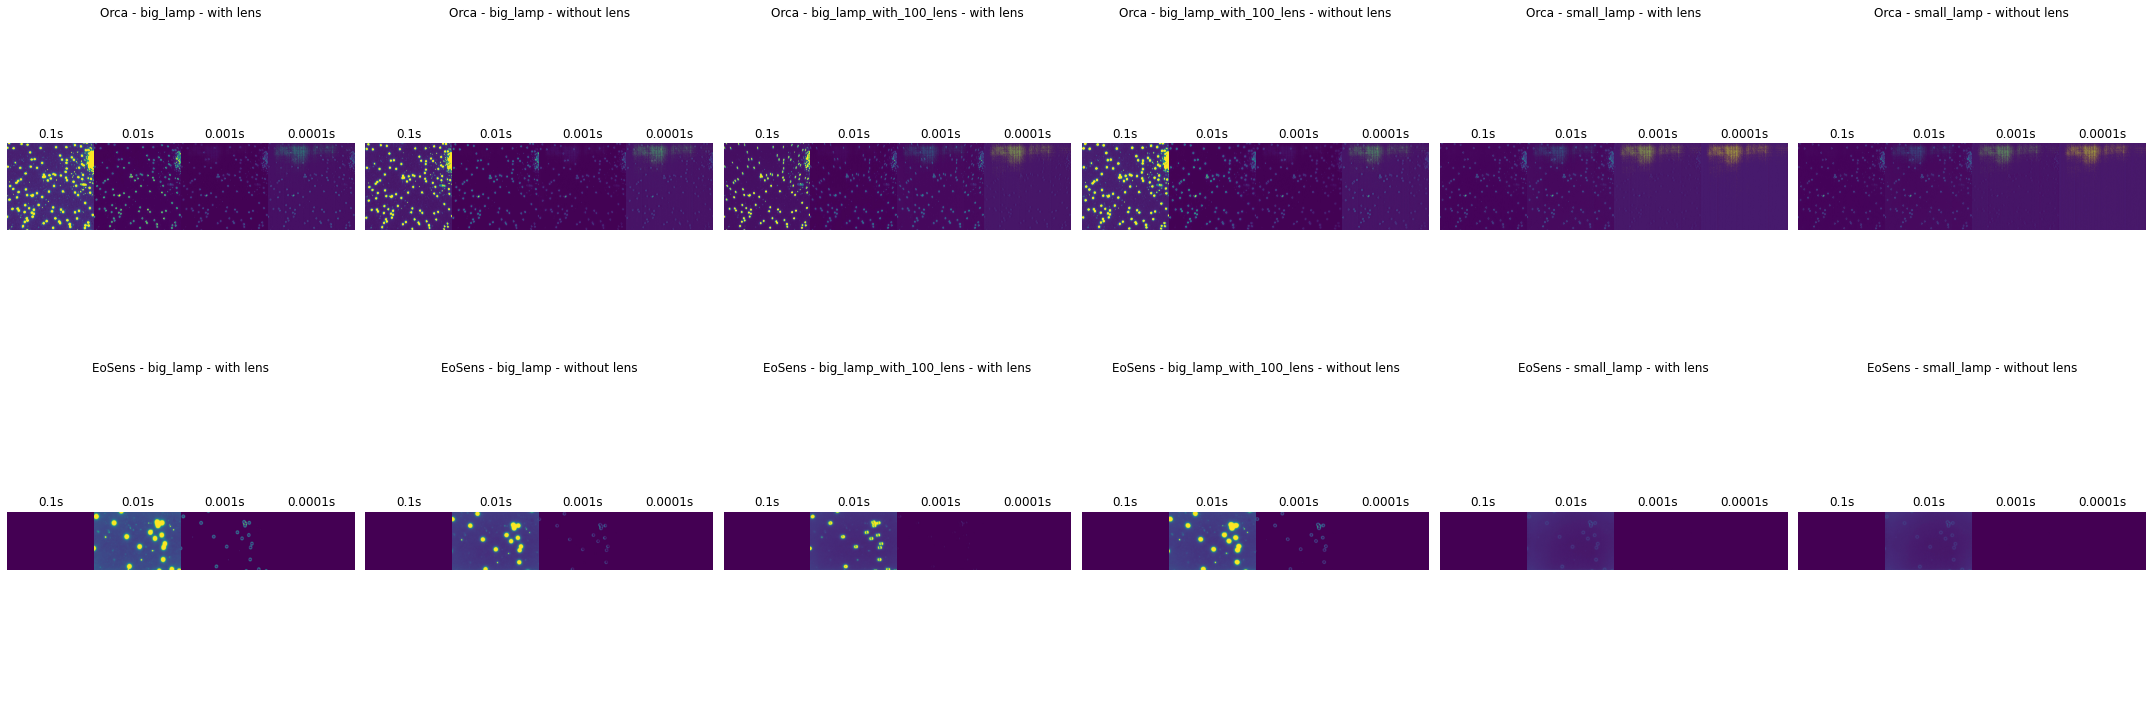

In [47]:
import os
import matplotlib.pyplot as plt

cameras = ["Orca", "EoSens"]
lamps = ["big_lamp", "big_lamp_with_100_lens", "small_lamp"]
exposure_times = [0.1, 0.01, 0.001, 0.0001]  # from a tenth of a second to ten-thousandth
second_lens_configurations = [True, False]

def plot_all_data():
    fig, axes = plt.subplots(len(cameras), len(lamps) * len(second_lens_configurations), figsize=(30, 10))

    for i, camera in enumerate(cameras):
        for j, lamp in enumerate(lamps):
            for k, second_lens in enumerate(second_lens_configurations):
                ax_index = j * len(second_lens_configurations) + k
                ax = axes[i, ax_index]
                
                lens_dir = "with_second_condensor_lens" if second_lens else "without_second_condensor_lens"
                dir_structure = os.path.join("pictures", camera, lamp, lens_dir)

                # Load all images for this configuration
                images = []
                for exposure_time in exposure_times:
                    image_path = os.path.join(dir_structure, f"exposure_{exposure_time}.jpg")
                    
                    if os.path.exists(image_path):
                        img = plt.imread(image_path)
                        images.append(img)

                # Plot the images in a subgrid within the current grid cell
                for l, (img, exposure_time) in enumerate(zip(images, exposure_times)):
                    inner_ax = ax.inset_axes([l*0.25, 0, 0.25, 1])  # [x, y, width, height]
                    inner_ax.imshow(img)
                    inner_ax.set_title(f"{exposure_time}s")
                    inner_ax.axis('off')

                lens_status = "with lens" if second_lens else "without lens"
                ax.set_title(f"{camera} - {lamp} - {lens_status}")
                ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_all_data()


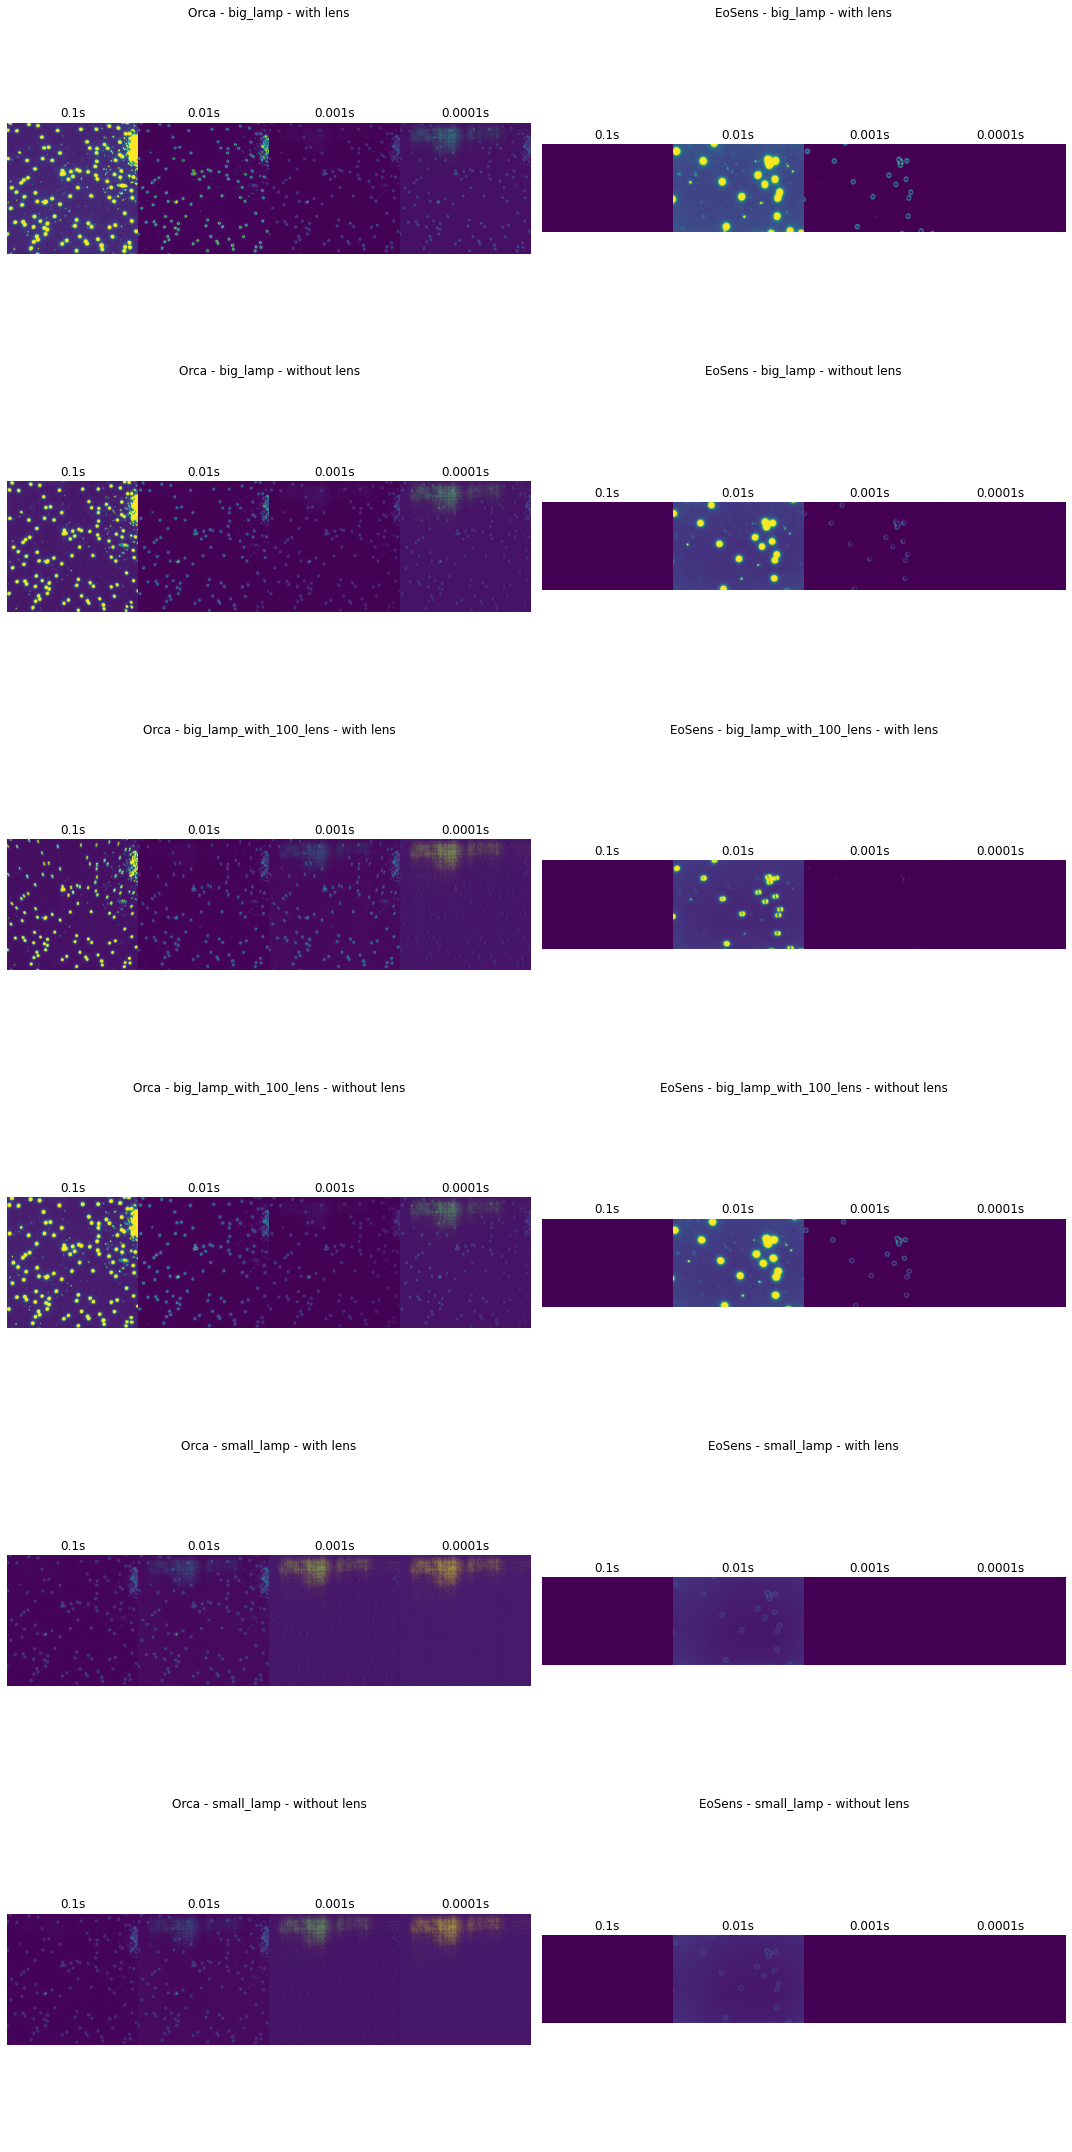

In [2]:
import os
import matplotlib.pyplot as plt

cameras = ["Orca", "EoSens"]
lamps = ["big_lamp", "big_lamp_with_100_lens", "small_lamp"]
exposure_times = [0.1, 0.01, 0.001, 0.0001]  # from a tenth of a second to ten-thousandth
second_lens_configurations = [True, False]

def plot_all_data():
    fig, axes = plt.subplots(len(lamps) * len(second_lens_configurations), len(cameras), figsize=(15, 30))
    fig.patch.set_facecolor('white')

    for j, lamp in enumerate(lamps):
        for k, second_lens in enumerate(second_lens_configurations):
            for i, camera in enumerate(cameras):
                row_index = j * len(second_lens_configurations) + k
                ax = axes[row_index, i]

                lens_dir = "with_second_condensor_lens" if second_lens else "without_second_condensor_lens"
                dir_structure = os.path.join("pictures", camera, lamp, lens_dir)

                # Load all images for this configuration
                images = []
                for exposure_time in exposure_times:
                    image_path = os.path.join(dir_structure, f"exposure_{exposure_time}.jpg")
                    
                    if os.path.exists(image_path):
                        img = plt.imread(image_path)
                        images.append(img)

                # Plot the images in a subgrid within the current grid cell
                for l, (img, exposure_time) in enumerate(zip(images, exposure_times)):
                    inner_ax = ax.inset_axes([l*0.25, 0, 0.25, 1])  # [x, y, width, height]
                    inner_ax.imshow(img)
                    inner_ax.set_title(f"{exposure_time}s")
                    inner_ax.axis('off')

                lens_status = "with lens" if second_lens else "without lens"
                ax.set_title(f"{camera} - {lamp} - {lens_status}")
                ax.axis('off')

    plt.tight_layout()
    plt.show()

plot_all_data()


In [83]:
core.set_exposure(.1)# set exposure time in milliseconds
core.get_exposure()
image= snap_image_Orca()
plt.imshow(image)

In [82]:
core.set_exposure(.1)# set exposure time in milliseconds
core.get_exposure()

0.10305882352941176

In [8]:
ia.remote_device.node_map.Gain.value

4.0

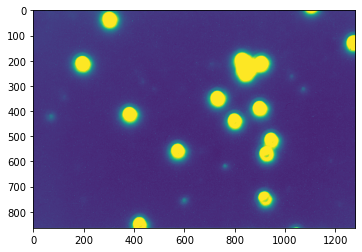

In [13]:
ia.remote_device.node_map.AcquisitionFrameRate.value = 1
ia.remote_device.node_map.ExposureTime.value = 1000000*0.98
ia.start()
frame=ia.fetch()

ia.stop()
image=frame.payload.components[0].data
image=np.reshape(image,(frame.payload.components[0].height,frame.payload.components[0].width))

plt.imshow(image)